# RSA

In [3]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
subj = 'subj001'
data_path = '../data'
rdm_path = f'{data_path}/interim/PairwiseDecoding/{subj}'
annotation_file = f'{data_path}/raw/annotations/annotations.csv'

## Load RDM

The RDMs are saved separately for each iteration (of 20). Load the RDMs and average them. Then plot the average RDM across time. This visualization is a check of the data quality. 

In [50]:
files = sorted(glob(f'{rdm_path}/*.npy'))
rdm = []
for f in files:
    rdm.append(np.load(f))
average_rdm = np.nanmean(rdm,axis=0)
row_idx, col_idx = np.triu_indices(average_rdm.shape[0], k=1)  # k=1 excludes the diagonal
average_upper_rdm = np.nanmean(average_rdm[row_idx, col_idx, :], axis=0)

/var/folders/bp/2lmtx6qs4rzbksq18mtrbrjsfr_flb/T/ipykernel_3432/1522961529.py:4: RuntimeWarning: Mean of empty slice
  average_rdm = np.nanmean(rdm,axis=0)


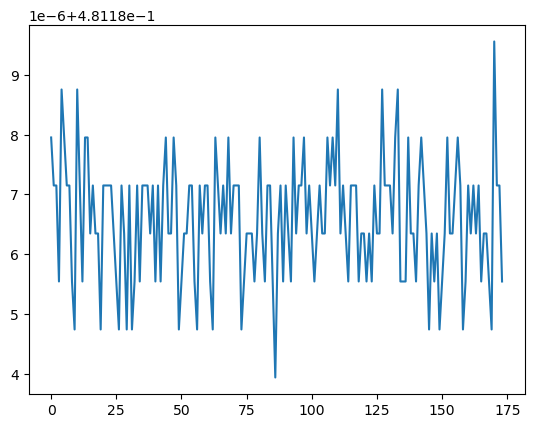

In [51]:
plt.plot(average_upper_rdm)

## Feature RDMs

Load the feature annotations and make the RDMs. Care needs to be paid to ensure that that the order of the vidoes across the two RDMs is consistent. 

In [55]:
df = pd.read_csv(annotation_file)
df.head()

,video_name,indoor,expanse,transitivity,agent distance,facingness,joint action,communication,cooperation,dominance,intimacy,valence,arousal
0,-YwZOeyAQC8_15.mp4,1,0.225,0.895833,0.000000,0.045455,0.700000,0.550,0.775000,0.700000,0.950,0.650000,0.340909
1,1AIVH5cEWrI_35.mp4,1,0.250,0.104167,0.075000,1.000000,0.825000,0.900,0.825000,0.025000,0.750,0.675000,0.340909
2,2-8-0-2-5-4-8-8-5028025488_7.mp4,1,0.275,1.000000,0.045455,0.050000,0.575000,0.500,0.725000,0.425000,0.825,0.675000,0.075000
3,3PJaYWt0cws_5.mp4,0,0.625,1.000000,0.725000,0.340909,0.022727,0.150,0.425000,0.250000,0.425,0.600000,0.400000
4,7-5-1-0-3-6-9-8-3775103698_9.mp4,1,0.275,0.925000,0.275000,0.636364,0.750000,0.825,0.795455,0.181818,0.450,0.722222,0.125000
